In [3]:
import pandas as pd
import os
import tifffile as tiff
import matplotlib.pyplot as plt
import pathophys as pp
import numpy as np
import math
import seaborn as sns
from scipy.stats import norm,tukey_hsd
from sklearn.linear_model import LinearRegression


def getimfolder(experiment):
    import os
    basedir = ""
    data = "E:\diploma_thesis\Data"
    for folder in os.listdir(data):
        if str(experiment) in folder:
            basedir = os.path.join(data, folder)
    return basedir

experiment = "Y"
basedir = getimfolder(experiment)
print(basedir)

E:\diploma_thesis\Data\Y. Quenching


In [4]:
folder = os.path.join(basedir, "Experiment")
spark = pd.read_excel(os.path.join(folder,"Spark.xlsx"))
topc = list(spark.columns)[0]
print(spark[topc])

0                       Application: SparkControl
1                                   Device: Spark
2                                       Firmware:
3                                             NaN
4                                           Date:
5                                           Time:
6                                          System
7                                            User
8                                           Plate
9                                      Lid lifter
10                              Humidity Cassette
11                                    Smooth mode
12                                            NaN
13    List of actions in this measurement script:
14                                          Plate
15                                            NaN
16                                            NaN
17                                           Name
18                                   Plate layout
19                                     Plate area


In [5]:
data = {}
for heading in ["Well","Mean","StDev","1;2","2;1","2;2","2;3","3;2"]:
    data[heading] = spark[spark[topc]==heading].values[0][1:]
rawdf = pd.DataFrame(data=data)
rawdf["Mean"] = pd.to_numeric(rawdf["Mean"])
rawdf["Well"] = rawdf["Well"].astype(str)
rawdf = rawdf.set_index(rawdf["Well"])
print(rawdf["Well"] )
rawdf.head()

Well
A1      A1
A2      A2
A3      A3
A4      A4
A5      A5
      ... 
H8      H8
H9      H9
H10    H10
H11    H11
H12    H12
Name: Well, Length: 96, dtype: object


,Well,Mean,StDev,1;2,2;1,2;2,2;3,3;2
Well,,,,,,,,
A1,A1,17589.4,2094.893267,19839,17020,19618,16502,14968
A2,A2,31710.8,3869.634246,34620,30105,36815,29573,27441
A3,A3,33108.2,3848.512141,36069,31267,38182,31052,28971
A4,A4,37955.4,4530.249198,41932,36562,43285,35520,32478
A5,A5,27431.6,3181.497965,30028,26392,31298,25947,23493


In [6]:
import string
datag = {}
g1df = pd.read_excel(os.path.join(folder,"Group1.xlsx"),header=None)
g1array = g1df.to_numpy()
datag["Group"] = g1array.flatten()
datag["n"] = np.array([np.array(range(1,len(g1array[i])+1)) for i in range(g1array.shape[0])]).flatten()
alphabet = list(string.ascii_uppercase)
datag["l"] = np.array([np.array([alphabet[i] for j in range(g1array.shape[1])]) for i in range(g1array.shape[0])]).flatten()
gdf = pd.DataFrame(data=datag)
gdf["Well"] = gdf["l"]+gdf["n"].astype(str)
gdf = gdf.drop("n",axis = 1)
gdf = gdf.drop("l",axis = 1)
gdf["Well"] = gdf["Well"].astype(str)
gdf = gdf.set_index(gdf["Well"])
gdf.head()

,Group,Well
Well,,
A1,X,A1
A2,X,A2
A3,X,A3
A4,X,A4
A5,X,A5


In [11]:
df = pd.concat([rawdf,gdf], join="inner", axis=1)
df["Mean"] = df["Mean"]/1000
df.head()
df.to_csv(os.path.join(r"E:\diploma_thesis\Data\Y. Quenching", "Results.csv"))

In [8]:
datag2 = {}
g2df = pd.read_excel(os.path.join(folder,"Lin.xlsx"),header=None)
g2array = g2df.to_numpy()
datag2["Group"] = g2array.flatten()
datag2["n"] = np.array([np.array(range(1,len(g2array[i])+1)) for i in range(g2array.shape[0])]).flatten()
alphabet = list(string.ascii_uppercase)
datag2["l"] = np.array([np.array([alphabet[i] for j in range(g2array.shape[1])]) for i in range(g2array.shape[0])]).flatten()
gdf2 = pd.DataFrame(data=datag2)

gdf2["Well"] = gdf2["l"]+gdf2["n"].astype(str)
gdf2 = gdf2.drop("n",axis = 1)

gdf2 = gdf2.drop("l",axis = 1)
gdf2["Well"] = gdf2["Well"].astype(str)

#print(gdf2.shape)
gdf2 = gdf2.set_index("Well")

print(gdf2.head())

      Group
Well       
A1      NaN
A2      NaN
A3      NaN
A4      NaN
A5      NaN


In [9]:
df2 = pd.concat([rawdf,gdf2], join="inner", axis=1)
df2["Mean"] = df2["Mean"]/1000
df2 = df2.dropna()
df2.head()

,Well,Mean,StDev,1;2,2;1,2;2,2;3,3;2,Group
Well,,,,,,,,,
D1,D1,25.6194,2864.930069,27517,25758,29081,23899,21842,11.0
D2,D2,25.5546,2776.748692,27627,25002,29012,24041,22091,11.0
D3,D3,26.0840,2724.008535,27945,25959,29478,24392,22646,11.0
D4,D4,34.0052,3802.181177,36605,33708,38791,31676,29246,15.0
D5,D5,32.8174,3409.56072,35104,32212,37259,30859,28653,15.0


In [12]:
df2.to_csv(os.path.join(r"E:\diploma_thesis\Data\Y. Quenching", "Curve.csv"))

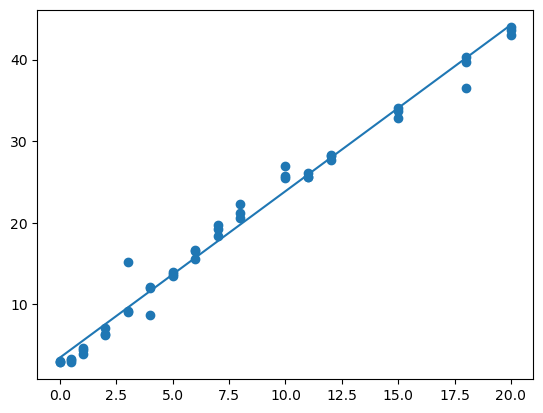

In [8]:
plt.scatter(df2["Group"],df2["Mean"])

reg = LinearRegression().fit(df2["Group"].values.reshape(-1, 1), df2["Mean"].values.reshape(-1, 1))
xval = np.arange(df2["Group"].min(),df2["Group"].max(),0.1)
plt.plot(xval, xval*float(reg.coef_)+reg.intercept_)

R2: 0.9855767577428638
[] []
PathPatch6((0.6, 22.3736) ...)
PathPatch6((1.6, 23.6632) ...)
PathPatch6((2.6, 23.3332) ...)
1
X vs. TP: 0.6439368061613943
1
X vs. FY: 0.8925619398440121


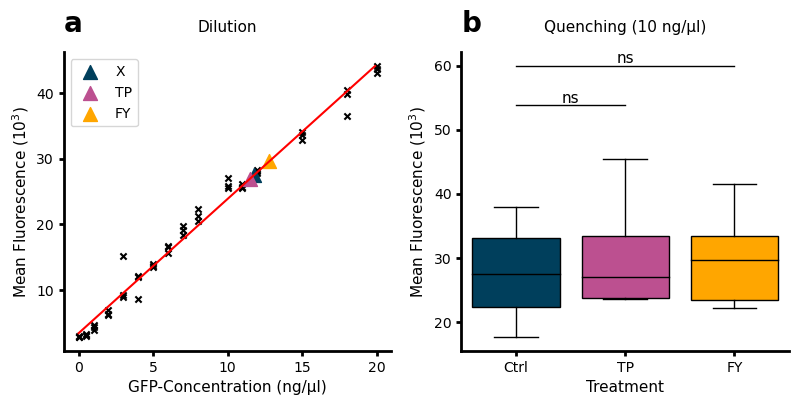

In [14]:
def bootstrap_mean(data,nit=10000):
    means = []
    for i in range(nit):
        rng = np.random.default_rng()
        XR = rng.choice(data,replace=True,size=data.shape[0],axis=0)
        means.append(np.mean(XR))
    return np.percentile(means,2.5),np.percentile(means,97.5)



sigp = [["X","TP"],["X","FY"]]
params = pp.loadparams()
#sns.set_palette(sns.color_palette(params["Colors"]))
bs = params["BarSize"]
ls = params["LS"]
fig = plt.figure(constrained_layout=True, figsize=(20*pp.cm,10*pp.cm))
subfigs = fig.subfigures(1,2)

axUp = subfigs[0].subplots(1, 1, sharey=True)

reg = LinearRegression().fit(df2["Group"].values.reshape(-1, 1), df2["Mean"].values.reshape(-1, 1))
xval = np.arange(df2["Group"].min(),df2["Group"].max(),0.1)
axUp.plot(xval, xval*float(reg.coef_)+reg.intercept_,c="red")
axUp.scatter(df2["Group"],df2["Mean"],c="black",marker="x",s=20)
print("R2: "+str(reg.score(df2["Group"].values.reshape(-1, 1), df2["Mean"].values.reshape(-1, 1))))
i = 0
leg = []
for g in ['X','TP', 'FY']:
    x = (df["Mean"][df["Group"]==g].median()-reg.intercept_)/float(reg.coef_)
    y = df["Mean"][df["Group"]==g].median()
    errlo = np.percentile(df["Mean"][df["Group"]==g].values,2.5)
    errup = np.percentile(df["Mean"][df["Group"]==g].values,97.5)
    leg.append(axUp.scatter(x,y,c=params["Colors"][i],marker="^",s=100))
    #leg.append(axUp.errorbar(x, y, xerr=[x-(errlo-reg.intercept_)/float(reg.coef_),(errup-reg.intercept_)/float(reg.coef_)-x], fmt="^",ecolor=params["Colors"][i],ms=10,mec=params["Colors"][i]))
    i = i+1
for axis in ['top','bottom','left','right']:
    axUp.spines[axis].set_linewidth(ls)
    if axis in ['top','right']:
        axUp.spines[axis].set_visible(False)
axUp.tick_params(width=ls)
handles, labels = axUp.get_legend_handles_labels()
print(handles, labels)
axUp.legend(leg,['X','TP', 'FY'])
axUp.set_title("Dilution", fontsize=11)
axUp.set_title("a", loc="left", fontsize=20, fontweight="bold", pad=15)
axUp.set_xlabel("GFP-Concentration (ng/µl)", fontsize=11)
axUp.set_ylabel("Mean Fluorescence ("+'$10^3$'+")", fontsize=11)

axLo = subfigs[1].subplots(1, 1, sharey=True)
X2 = []
X3 = []
Y2 = []
maxvs = []
for g in ['X','TP', 'FY']:
    if g == "X":
        X3.append("Ctrl")
    else:
        X3.append(g)
    X2.append(g)
    Y2.append(df["Mean"][df["Group"]==g])
    maxvs.append(df["Mean"][df["Group"]==g].quantile(0.75)+(1.5*(df["Mean"][df["Group"]==g].quantile(0.75)-df["Mean"][df["Group"]==g].quantile(0.25))))
    #CI1.append(1.96*(df["Mean"][df["Group"]==g].std())/math.sqrt(len(df[df["Group"]==g])))
bplot = axLo.boxplot(Y2,widths=0.8,labels=X3, showfliers=False,patch_artist=True)
colors = params["Colors"]
for median in bplot['medians']:
    median.set_color('black')
for patch, color in zip(bplot['boxes'], colors):
    print(patch)
    patch.set_facecolor(color)
for axis in ['top','bottom','left','right']:
    axLo.spines[axis].set_linewidth(ls)
    if axis in ['top','right']:
        axLo.spines[axis].set_visible(False)
axLo.tick_params(width=ls)
maxv2 = np.max(np.array(maxvs))
hightind = 0
bottom2, top2 = axLo.get_ylim()
y_range = top2 - bottom2
treatmenti = 0
args = [df["Mean"][df["Group"]==g].values for g in df["Group"].unique()]
m_comp = tukey_hsd(*args)
for pairs in sigp:
    c1 = pairs[0]
    ctrli = X2.index(c1)
    c2 = pairs[1]
    treatmenti = X2.index(c2)
    c1dic = {c1:ctrli+1}
    c2dic = {c2:treatmenti+1}
    diff = ((treatmenti-ctrli)/2)+1
    pp.drawsigbars(df, axLo, "Group", "Mean", c1dic, c2dic, maxv2+hightind, y_range, diff)
    hightind = hightind + y_range*0.2
axLo.set_title("Quenching (10 ng/µl)", fontsize=11)
axLo.set_title("b", loc="left", fontsize=20, fontweight="bold", pad=15)
axLo.set_xlabel("Treatment", fontsize=11)
axLo.set_ylabel("Mean Fluorescence ("+'$10^3$'+")", fontsize=11)


plt.show()

In [15]:
df.groupby(["Group"])["Mean"].mean()

Group
FY    29.304756
TP    30.841867
X     27.740533
Name: Mean, dtype: float64

In [11]:
df.groupby(["Group"])["Mean"].quantile(0.025)

Group
FY    22.13528
TP    23.52340
X     17.97960
Name: Mean, dtype: float64

In [12]:
df.groupby(["Group"])["Mean"].quantile(0.975)

Group
FY    40.33788
TP    44.61248
X     37.18828
Name: Mean, dtype: float64